In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

In [18]:
genome_scores = pd.read_csv('genome-scores.csv')

In [3]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000


In [22]:
genome_tags = pd.read_csv('genome-tags.csv')

In [23]:
links = pd.read_csv('links.csv')

In [68]:
movie_industry = pd.read_csv('movie_industry.csv', encoding='latin-1')
movie_industry = movie_industry.rename(columns={"name":"title"})
movie_industry.head()
#movie_industry.describe() 6820
#movie_industry['title'].unique()
#len(movie_industry['title'].unique()) 6731 some duplicates
#movie_industry['title'] = movie_industry['title'].unique()
#movie_industry.head()

,budget,company,country,director,genre,gross,title,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [43]:
movies = pd.read_csv('movies.csv')
func = lambda x: x.rsplit(' ', 1)[0]
movies['title']=movies['title'].apply(func)
movies.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [8]:
ratings = pd.read_csv('ratings.csv')

In [11]:
tags = pd.read_csv('tags.csv')

In [3]:
oscar = pd.read_csv('the_oscar_award.csv')

In [15]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [16]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
movie_industry = movie_industry.rename(columns={"name":"title"})
#movie_industry.head()


In [18]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings.head() #28 million rows should append files to here

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [12]:
tags.head() #merge with ratings

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [21]:
oscar.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [13]:
#new_df = pd.merge(ratings, tags, how='left')
merged = ratings.merge(tags, on=['userId','movieId'])

In [32]:
merged.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y
0,14,110,4.5,1442169623,epic,1443148538
1,14,110,4.5,1442169623,Medieval,1443148532
2,14,318,4.5,1442169454,imdb top 250,1442615195
3,14,318,4.5,1442169454,justice,1442615192
4,14,480,4.5,1442169372,Dinosaurs,1443148563


In [16]:
merged_2 = merged.merge(movies, on=['movieId'])

In [ ]:
merged_2.head()

In [19]:
merged_3 = genome_scores.merge(movies, on=['movieId'])

In [36]:
merged_3.head()

,movieId,tagId,relevance,title,genres
0,1,1,0.02900,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,0.02375,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,3,0.05425,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,4,0.06875,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1,5,0.16000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [24]:
merged_tags = merged_3.merge(genome_tags, on=['tagId'])

In [25]:
merged_tags.head()

,movieId,tagId,relevance,title,genres,tag
0,1,1,0.02900,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,007
1,2,1,0.03625,Jumanji (1995),Adventure|Children|Fantasy,007
2,3,1,0.04150,Grumpier Old Men (1995),Comedy|Romance,007
3,4,1,0.03350,Waiting to Exhale (1995),Comedy|Drama|Romance,007
4,5,1,0.04050,Father of the Bride Part II (1995),Comedy,007


In [26]:
#text.rsplit(' ', 1)[0]
func = lambda x: x.rsplit(' ', 1)[0]
merged_tags['title']=merged_tags['title'].apply(func)

In [27]:
merged_tags.head()

,movieId,tagId,relevance,title,genres,tag
0,1,1,0.02900,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,007
1,2,1,0.03625,Jumanji,Adventure|Children|Fantasy,007
2,3,1,0.04150,Grumpier Old Men,Comedy|Romance,007
3,4,1,0.03350,Waiting to Exhale,Comedy|Drama|Romance,007
4,5,1,0.04050,Father of the Bride Part II,Comedy,007


In [28]:
merged_tags_industry = merged_tags.merge(movie_industry, on=['title'])

In [29]:
merged_tags_industry.head()

,movieId,tagId,relevance,title,genres,tag,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year
0,1,1,0.02900,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,007,30000000.0,Pixar Animation Studios,USA,John Lasseter,Animation,191796233.0,G,1995-11-22,81,8.3,Tom Hanks,694113,John Lasseter,1995
1,1,2,0.02375,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,007 (series),30000000.0,Pixar Animation Studios,USA,John Lasseter,Animation,191796233.0,G,1995-11-22,81,8.3,Tom Hanks,694113,John Lasseter,1995
2,1,3,0.05425,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,18th century,30000000.0,Pixar Animation Studios,USA,John Lasseter,Animation,191796233.0,G,1995-11-22,81,8.3,Tom Hanks,694113,John Lasseter,1995
3,1,4,0.06875,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1920s,30000000.0,Pixar Animation Studios,USA,John Lasseter,Animation,191796233.0,G,1995-11-22,81,8.3,Tom Hanks,694113,John Lasseter,1995
4,1,5,0.16000,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1930s,30000000.0,Pixar Animation Studios,USA,John Lasseter,Animation,191796233.0,G,1995-11-22,81,8.3,Tom Hanks,694113,John Lasseter,1995


In [30]:
tags_and_industry = merged_tags_industry.sort_values(by=['relevance'], ascending=False)

In [62]:
merged_tags_industry.sort_values(by=['score'], ascending=False)

,movieId,tagId,relevance,title,genres,tag,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year
224048,296,705,0.04400,Pulp Fiction,Comedy|Crime|Drama|Thriller,new york city,8000000.0,Miramax,USA,Quentin Tarantino,Crime,107928762.0,R,1994-10-14,154,8.9,John Travolta,1456787,Quentin Tarantino,1994
223911,296,568,0.03000,Pulp Fiction,Comedy|Crime|Drama|Thriller,island,8000000.0,Miramax,USA,Quentin Tarantino,Crime,107928762.0,R,1994-10-14,154,8.9,John Travolta,1456787,Quentin Tarantino,1994
223904,296,561,0.00350,Pulp Fiction,Comedy|Crime|Drama|Thriller,iraq war,8000000.0,Miramax,USA,Quentin Tarantino,Crime,107928762.0,R,1994-10-14,154,8.9,John Travolta,1456787,Quentin Tarantino,1994
223905,296,562,0.08975,Pulp Fiction,Comedy|Crime|Drama|Thriller,ireland,8000000.0,Miramax,USA,Quentin Tarantino,Crime,107928762.0,R,1994-10-14,154,8.9,John Travolta,1456787,Quentin Tarantino,1994
223906,296,563,0.04200,Pulp Fiction,Comedy|Crime|Drama|Thriller,irish,8000000.0,Miramax,USA,Quentin Tarantino,Crime,107928762.0,R,1994-10-14,154,8.9,John Travolta,1456787,Quentin Tarantino,1994
223907,296,564,0.28450,Pulp Fiction,Comedy|Crime|Drama|Thriller,irish accent,8000000.0,Miramax,USA,Quentin Tarantino,Crime,107928762.0,R,1994-10-14,154,8.9,John Travolta,1456787,Quentin Tarantino,1994
223908,296,565,0.77375,Pulp Fiction,Comedy|Crime|Drama|Thriller,ironic,8000000.0,Miramax,USA,Quentin Tarantino,Crime,107928762.0,R,1994-10-14,154,8.9,John Travolta,1456787,Quentin Tarantino,1994
223909,296,566,0.46500,Pulp Fiction,Comedy|Crime|Drama|Thriller,irreverent,8000000.0,Miramax,USA,Quentin Tarantino,Crime,107928762.0,R,1994-10-14,154,8.9,John Travolta,1456787,Quentin Tarantino,1994
223910,296,567,0.04175,Pulp Fiction,Comedy|Crime|Drama|Thriller,islam,8000000.0,Miramax,USA,Quentin Tarantino,Crime,107928762.0,R,1994-10-14,154,8.9,John Travolta,1456787,Quentin Tarantino,1994
223912,296,569,0.03875,Pulp Fiction,Comedy|Crime|Drama|Thriller,isolation,8000000.0,Miramax,USA,Quentin Tarantino,Crime,107928762.0,R,1994-10-14,154,8.9,John Travolta,1456787,Quentin Tarantino,1994


In [63]:
merged_2['title']=merged_2['title'].apply(func)

In [68]:
merged_2.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
0,14,110,4.5,1442169623,epic,1443148538,Braveheart,Action|Drama|War
1,14,110,4.5,1442169623,Medieval,1443148532,Braveheart,Action|Drama|War
2,815,110,2.5,1053219399,overrated,1150006110,Braveheart,Action|Drama|War
3,2577,110,4.5,1378324220,Oscar (Best Picture),1378324225,Braveheart,Action|Drama|War
4,3086,110,5.0,1462977009,epic,1463675332,Braveheart,Action|Drama|War


In [65]:
merged_user_ratings = merged_2.merge(movie_industry, on=['title'])

In [69]:
merged_user_ratings #sentiment scores?

,userId,movieId,rating_x,timestamp_x,tag,timestamp_y,title,genres,budget,company,...,genre,gross,rating_y,released,runtime,score,star,votes,writer,year
0,14,110,4.5,1442169623,epic,1443148538,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
1,14,110,4.5,1442169623,Medieval,1443148532,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
2,815,110,2.5,1053219399,overrated,1150006110,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
3,2577,110,4.5,1378324220,Oscar (Best Picture),1378324225,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
4,3086,110,5.0,1462977009,epic,1463675332,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
5,3086,110,5.0,1462977009,inspirational,1463675342,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
6,3086,110,5.0,1462977009,war,1463675328,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
7,5848,110,4.0,1432234167,epic,1432234174,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
8,5848,110,4.0,1432234167,historical,1432234185,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
9,5848,110,4.0,1432234167,Medieval,1432234179,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995


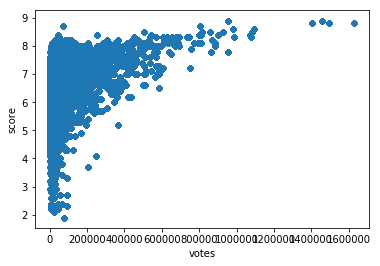

In [70]:
merged_tags_industry.plot.scatter('votes','score')

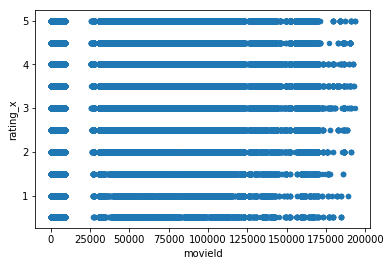

In [71]:
merged_user_ratings.plot.scatter('movieId','rating_x')

,userId,movieId,rating_x,timestamp_x,timestamp_y,budget,gross,runtime,score,votes,year
userId,1.000000,-0.016608,0.072854,-0.003846,-0.036807,0.001786,0.008835,-0.003556,0.017118,0.021905,-0.010340
movieId,-0.016608,1.000000,-0.057055,0.371860,0.326386,0.236389,0.125985,-0.011754,-0.042619,-0.035512,0.823785
rating_x,0.072854,-0.057055,1.000000,0.018036,0.027829,-0.053617,-0.003415,0.120115,0.379873,0.223246,-0.043473
timestamp_x,-0.003846,0.371860,0.018036,1.000000,0.881888,0.076201,0.050198,0.028478,0.048973,0.054528,0.293336
timestamp_y,-0.036807,0.326386,0.027829,0.881888,1.000000,0.062743,0.047671,0.035355,0.053537,0.061947,0.237128
budget,0.001786,0.236389,-0.053617,0.076201,0.062743,1.000000,0.717779,0.377512,0.025931,0.337960,0.318055
gross,0.008835,0.125985,-0.003415,0.050198,0.047671,0.717779,1.000000,0.354294,0.207321,0.485265,0.148537
runtime,-0.003556,-0.011754,0.120115,0.028478,0.035355,0.377512,0.354294,1.000000,0.398456,0.486266,-0.001994
score,0.017118,-0.042619,0.379873,0.048973,0.053537,0.025931,0.207321,0.398456,1.000000,0.672086,-0.053916
votes,0.021905,-0.035512,0.223246,0.054528,0.061947,0.337960,0.485265,0.486266,0.672086,1.000000,0.017064


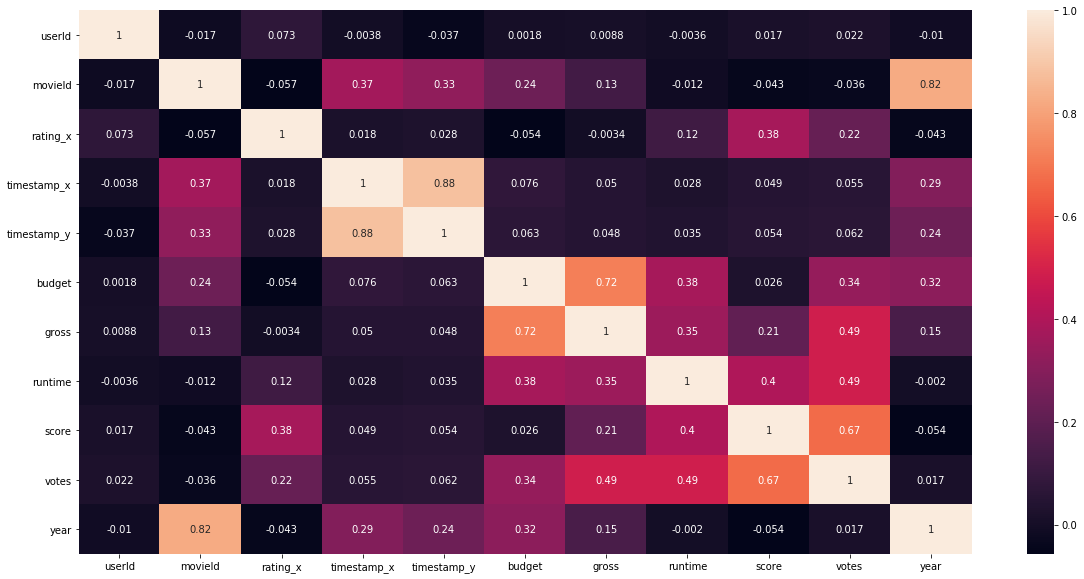

In [73]:
plt.figure(figsize=(20,10))
heat = merged_user_ratings.corr()
sns.heatmap(heat,annot=True) #heatmap showing correlation among variables to find relationships
heat

,movieId,tagId,relevance,budget,gross,runtime,score,votes,year
movieId,1.000000e+00,7.119975e-20,0.016469,1.654565e-01,1.219126e-01,4.873849e-02,1.267517e-01,1.503401e-01,7.734638e-01
tagId,7.119975e-20,1.000000e+00,0.020410,1.330265e-17,-1.079120e-19,6.228859e-18,3.050843e-18,9.582181e-19,7.961987e-18
relevance,1.646896e-02,2.040983e-02,1.000000,2.830969e-02,3.881028e-02,5.514783e-02,1.038270e-01,9.889081e-02,1.810927e-02
budget,1.654565e-01,1.330265e-17,0.028310,1.000000e+00,7.118495e-01,2.905225e-01,5.134448e-02,5.125840e-01,2.929923e-01
gross,1.219126e-01,-1.079120e-19,0.038810,7.118495e-01,1.000000e+00,2.374958e-01,1.894742e-01,6.706695e-01,1.870701e-01
runtime,4.873849e-02,6.228859e-18,0.055148,2.905225e-01,2.374958e-01,1.000000e+00,3.808562e-01,3.212714e-01,6.519521e-02
score,1.267517e-01,3.050843e-18,0.103827,5.134448e-02,1.894742e-01,3.808562e-01,1.000000e+00,4.212098e-01,1.034324e-01
votes,1.503401e-01,9.582181e-19,0.098891,5.125840e-01,6.706695e-01,3.212714e-01,4.212098e-01,1.000000e+00,2.357449e-01
year,7.734638e-01,7.961987e-18,0.018109,2.929923e-01,1.870701e-01,6.519521e-02,1.034324e-01,2.357449e-01,1.000000e+00


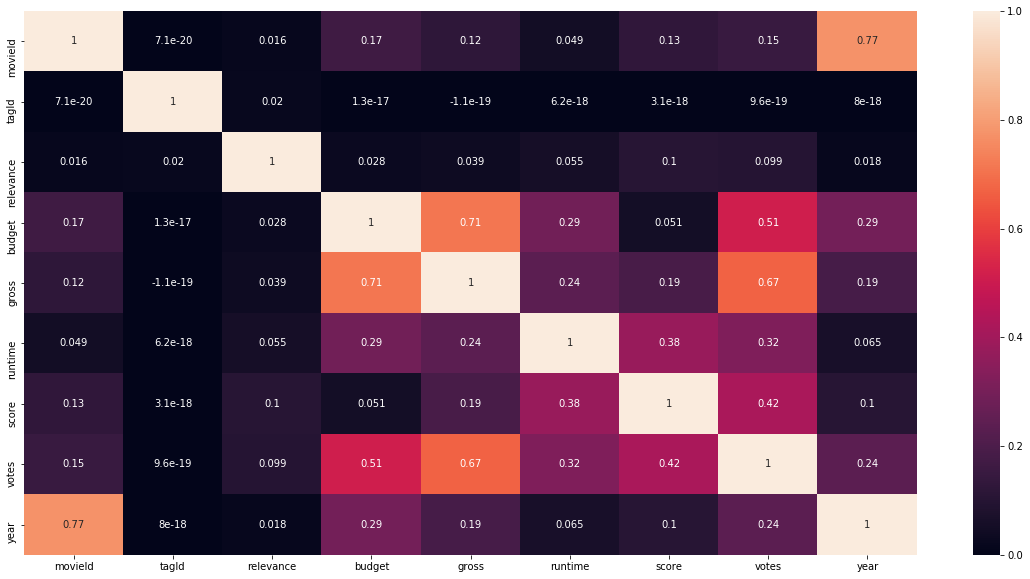

In [74]:
plt.figure(figsize=(20,10))
heat = merged_tags_industry.corr()
sns.heatmap(heat,annot=True) #heatmap showing correlation among variables to find relationships
heat

## To-Do

Merge dataset for Oscar and find factors that drive Oscar winner by category.

In [4]:
oscar.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [31]:
tags_and_industry.head() #perform merge here and only top relevant tags will be pulled into "oscar" dataset

,movieId,tagId,relevance,title,genres,tag,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year
3527313,47200,58,1.0,Crank,Action|Thriller,amy smart,12000000.0,Lakeshore Entertainment,USA,Mark Neveldine,Action,27829874.0,R,2006-09-01,88,7.0,Jason Statham,208393,Mark Neveldine,2006
2120218,4566,707,1.0,American Ninja 2: The Confrontation,Action|Adventure,ninja,350000.0,Cannon Group,USA,Sam Firstenberg,Action,4000000.0,R,1987-05-01,90,4.8,Michael Dudikoff,6565,Gary Conway,1987
3363153,34405,586,1.0,Serenity,Action|Adventure|Sci-Fi,kick-butt women,40000000.0,Universal Pictures,USA,Joss Whedon,Action,25514517.0,PG-13,2005-09-30,119,7.9,Nathan Fillion,255155,Joss Whedon,2005
165768,223,1081,1.0,Clerks,Comedy,view askew,230000.0,View Askew Productions,USA,Kevin Smith,Comedy,3151130.0,R,1994-11-09,92,7.8,Brian O'Halloran,190615,Kevin Smith,1994
950663,63992,1068,1.0,Twilight,Drama|Fantasy|Romance|Thriller,vampire human love,37000000.0,Summit Entertainment,USA,Catherine Hardwicke,Drama,191465414.0,PG-13,2008-11-21,122,5.2,Kristen Stewart,366772,Melissa Rosenberg,2008


In [32]:
oscar = oscar.rename(columns={"film":"title"})
oscar.head()

,year_film,year_ceremony,ceremony,category,name,title,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [35]:
oscar_merged = oscar.merge(tags_and_industry, on=['title'])
oscar_merged.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,movieId,tagId,relevance,...,genre,gross,rating,released,runtime,score,star,votes,writer,year
0,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1069,0.99975,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
1,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1106,0.99875,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
2,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1067,0.99700,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
3,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,19,0.97800,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
4,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,710,0.95375,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003


In [37]:
make_dummy = lambda x: 1 if x == True else 0 #make winner a dummy variable
oscar_merged['winner_dummy']=oscar_merged['winner'].apply(make_dummy)

In [38]:
oscar_merged.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,movieId,tagId,relevance,...,gross,rating,released,runtime,score,star,votes,writer,year,winner_dummy
0,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1069,0.99975,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1
1,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1106,0.99875,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1
2,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1067,0.99700,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1
3,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,19,0.97800,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1
4,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,710,0.95375,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1


,year_film,year_ceremony,ceremony,winner,movieId,tagId,relevance,budget,gross,runtime,score,votes,year,winner_dummy
year_film,1.000000e+00,1.000000e+00,9.999941e-01,-9.911420e-02,3.849405e-01,8.626596e-18,0.074347,1.629475e-01,2.285043e-01,-6.413086e-02,4.522289e-01,3.174528e-01,3.213150e-01,-9.911420e-02
year_ceremony,1.000000e+00,1.000000e+00,9.999941e-01,-9.911420e-02,3.849405e-01,8.626596e-18,0.074347,1.629475e-01,2.285043e-01,-6.413086e-02,4.522289e-01,3.174528e-01,3.213150e-01,-9.911420e-02
ceremony,9.999941e-01,9.999941e-01,1.000000e+00,-9.905451e-02,3.851360e-01,-1.486556e-19,0.074350,1.629181e-01,2.285686e-01,-6.428935e-02,4.525210e-01,3.175408e-01,3.214031e-01,-9.905451e-02
winner,-9.911420e-02,-9.911420e-02,-9.905451e-02,1.000000e+00,-3.246790e-02,-8.500826e-20,0.017373,8.604486e-02,1.459785e-01,7.621412e-02,7.095000e-02,1.559759e-01,-2.304386e-02,1.000000e+00
movieId,3.849405e-01,3.849405e-01,3.851360e-01,-3.246790e-02,1.000000e+00,-2.016900e-18,0.020682,1.146315e-01,7.612401e-02,-9.837407e-02,1.352175e-01,1.176719e-01,7.032749e-01,-3.246790e-02
tagId,8.626596e-18,8.626596e-18,-1.486556e-19,-8.500826e-20,-2.016900e-18,1.000000e+00,0.004897,-1.333876e-18,-5.382145e-18,1.432413e-17,-1.304183e-18,2.942879e-18,-4.614420e-18,-8.500826e-20
relevance,7.434715e-02,7.434715e-02,7.434969e-02,1.737255e-02,2.068209e-02,4.897414e-03,1.000000,2.549176e-02,4.298144e-02,1.589859e-02,1.247936e-01,1.212734e-01,2.694432e-02,1.737255e-02
budget,1.629475e-01,1.629475e-01,1.629181e-01,8.604486e-02,1.146315e-01,-1.333876e-18,0.025492,1.000000e+00,7.377380e-01,1.851256e-01,5.932600e-02,4.687650e-01,2.884248e-01,8.604486e-02
gross,2.285043e-01,2.285043e-01,2.285686e-01,1.459785e-01,7.612401e-02,-5.382145e-18,0.042981,7.377380e-01,1.000000e+00,1.525674e-01,2.775026e-01,6.467984e-01,1.201670e-01,1.459785e-01
runtime,-6.413086e-02,-6.413086e-02,-6.428935e-02,7.621412e-02,-9.837407e-02,1.432413e-17,0.015899,1.851256e-01,1.525674e-01,1.000000e+00,3.286965e-01,2.071296e-01,-1.193352e-01,7.621412e-02


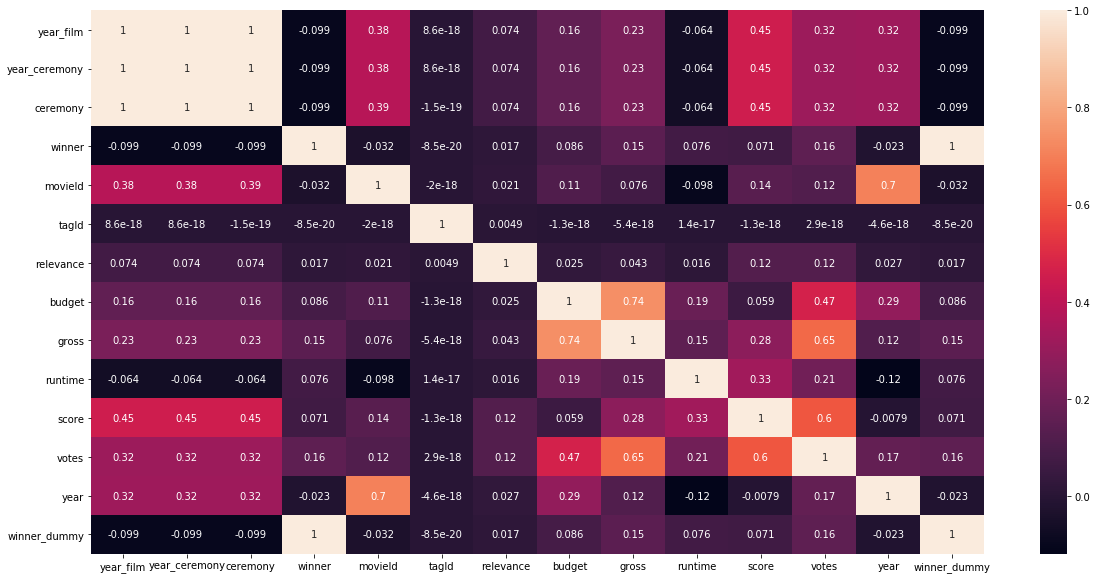

In [39]:
#regress to find factors that make nominated films Oscar winners
#first correlation map to find biggest factors

plt.figure(figsize=(20,10))
heat = oscar_merged.corr()
sns.heatmap(heat,annot=True) #heatmap showing correlation among variables to find relationships
heat

In [46]:
#weak correlation between gross and winner_dummy and between votes and winner_dummy; .086 between budget and winner_dummy
#duplicates for same award due to merging with tags so I'm going to do the same analysis with only movies merged in
oscar_and_movies = oscar.merge(movies, on=['title'])
oscar_and_movies = oscar_and_movies.merge(movie_industry, on=['title'])
oscar_and_movies

,year_film,year_ceremony,ceremony,category,name,title,winner,movieId,genres,budget,...,genre,gross,rating,released,runtime,score,star,votes,writer,year
0,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,1430,Comedy|Thriller,22000000.0,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
1,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,Action|Fantasy|Horror,22000000.0,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
2,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,79874,Crime|Drama|Film-Noir,22000000.0,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
3,1931,1932,5,ACTRESS,Marie Dressler,Emma,False,838,Comedy|Drama|Romance,6000000.0,...,Comedy,22201883.0,PG,1996-08-30,120,6.7,Gwyneth Paltrow,29972,Jane Austen,1996
4,1931,1932,5,ACTRESS,Marie Dressler,Emma,False,26958,Romance,6000000.0,...,Comedy,22201883.0,PG,1996-08-30,120,6.7,Gwyneth Paltrow,29972,Jane Austen,1996
5,1931,1932,5,ACTRESS,Marie Dressler,Emma,False,84847,Comedy|Drama|Romance,6000000.0,...,Comedy,22201883.0,PG,1996-08-30,120,6.7,Gwyneth Paltrow,29972,Jane Austen,1996
6,1931,1932,5,ACTRESS,Marie Dressler,Emma,False,85374,Comedy|Drama|Romance,6000000.0,...,Comedy,22201883.0,PG,1996-08-30,120,6.7,Gwyneth Paltrow,29972,Jane Austen,1996
7,1931,1932,5,ACTRESS,Marie Dressler,Emma,False,164819,(no genres listed),6000000.0,...,Comedy,22201883.0,PG,1996-08-30,120,6.7,Gwyneth Paltrow,29972,Jane Austen,1996
8,1931,1932,5,ACTRESS,Marie Dressler,Emma,False,188233,Drama|Romance,6000000.0,...,Comedy,22201883.0,PG,1996-08-30,120,6.7,Gwyneth Paltrow,29972,Jane Austen,1996
9,1996,1997,69,COSTUME DESIGN,Ruth Myers,Emma,False,838,Comedy|Drama|Romance,6000000.0,...,Comedy,22201883.0,PG,1996-08-30,120,6.7,Gwyneth Paltrow,29972,Jane Austen,1996


In [50]:
#movieids not unique which is a problem
#going to ignore genres for now and just keep unique titles for weighting issues
oscar_and_movies['title'].unique()
len(oscar_and_movies['title'])
#3627 unique films

3627

In [52]:
oscar_and_movies['category'].unique()
len(oscar_and_movies['category'].unique())

73

In [69]:
oscar_movies_only = oscar.merge(movie_industry, on=['title'])

In [72]:
oscar_movies_only.describe() #2930 observations
oscar_movies_only.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,budget,company,country,...,genre,gross,rating,released,runtime,score,star,votes,writer,year
0,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,22000000.0,Lakeshore Entertainment,USA,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
1,1928,1929,2,ACTOR,Lewis Stone,The Patriot,False,110000000.0,Columbia Pictures Corporation,USA,...,Action,113330342.0,R,2000-06-28,165,7.2,Mel Gibson,221478,Robert Rodat,2000
2,1928,1929,2,ART DIRECTION,Hans Dreier,The Patriot,False,110000000.0,Columbia Pictures Corporation,USA,...,Action,113330342.0,R,2000-06-28,165,7.2,Mel Gibson,221478,Robert Rodat,2000
3,1928,1929,2,DIRECTING,Ernst Lubitsch,The Patriot,False,110000000.0,Columbia Pictures Corporation,USA,...,Action,113330342.0,R,2000-06-28,165,7.2,Mel Gibson,221478,Robert Rodat,2000
4,1928,1929,2,OUTSTANDING PICTURE,Paramount Famous Lasky,The Patriot,False,110000000.0,Columbia Pictures Corporation,USA,...,Action,113330342.0,R,2000-06-28,165,7.2,Mel Gibson,221478,Robert Rodat,2000


In [73]:
make_dummy = lambda x: 1 if x == True else 0 #make winner a dummy variable
oscar_movies_only['winner_dummy']=oscar_movies_only['winner'].apply(make_dummy)

,year_film,year_ceremony,ceremony,winner,budget,gross,runtime,score,votes,year,winner_dummy
year_film,1.000000,1.000000,0.999993,-0.041095,0.122277,0.179857,0.045515,0.423338,0.254483,0.441246,-0.041095
year_ceremony,1.000000,1.000000,0.999993,-0.041095,0.122277,0.179857,0.045515,0.423338,0.254483,0.441246,-0.041095
ceremony,0.999993,0.999993,1.000000,-0.041024,0.122441,0.179977,0.045637,0.423635,0.254624,0.441579,-0.041024
winner,-0.041095,-0.041095,-0.041024,1.000000,0.055273,0.127834,0.065598,0.113977,0.169524,-0.009411,1.000000
budget,0.122277,0.122277,0.122441,0.055273,1.000000,0.709687,0.279302,0.041346,0.419670,0.285509,0.055273
gross,0.179857,0.179857,0.179977,0.127834,0.709687,1.000000,0.243034,0.278842,0.616072,0.134161,0.127834
runtime,0.045515,0.045515,0.045637,0.065598,0.279302,0.243034,1.000000,0.344947,0.342719,-0.036445,0.065598
score,0.423338,0.423338,0.423635,0.113977,0.041346,0.278842,0.344947,1.000000,0.628761,0.042608,0.113977
votes,0.254483,0.254483,0.254624,0.169524,0.419670,0.616072,0.342719,0.628761,1.000000,0.167007,0.169524
year,0.441246,0.441246,0.441579,-0.009411,0.285509,0.134161,-0.036445,0.042608,0.167007,1.000000,-0.009411


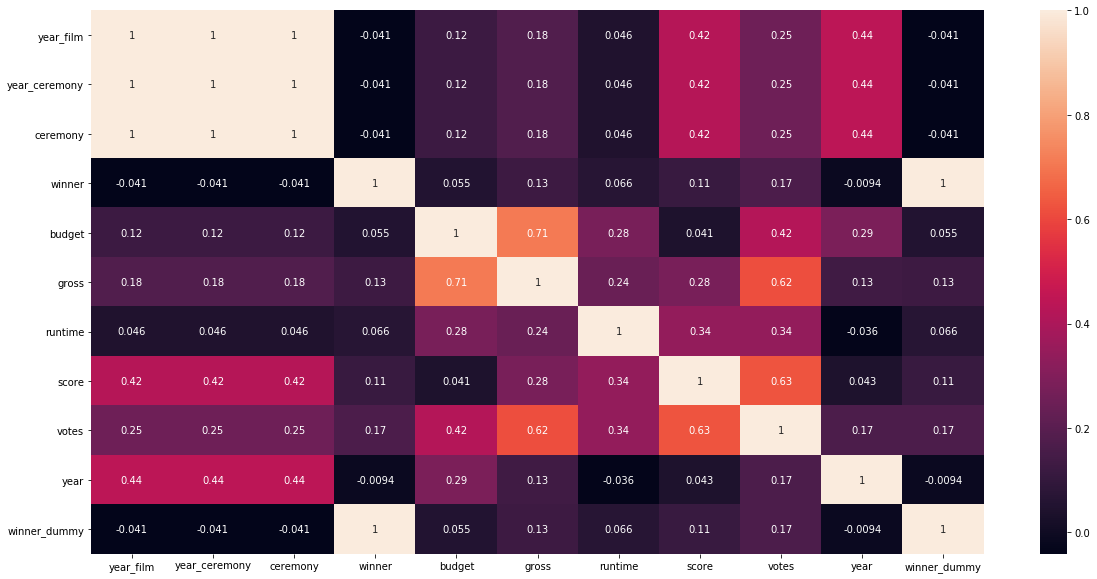

In [74]:
plt.figure(figsize=(20,10))
heat = oscar_movies_only.corr()
sns.heatmap(heat,annot=True) #heatmap showing correlation among variables to find relationships
heat

In [75]:
#Regression results: three biggest factors to winner_dummy are: votes, gross, and score (kinda intuitive)
#going to conduct binary logit test where oscar_winner (1 or 0) = beta*votes + beta2*gross + beta3*score


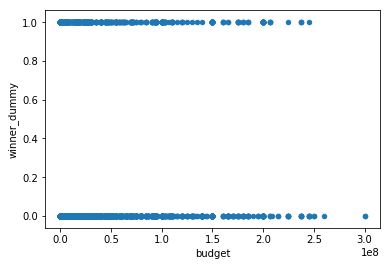

In [78]:
oscar_movies_only.plot.scatter('budget','winner_dummy')

(array([849., 713., 379., 215., 182.,  94., 170.,  50.,  35.,  30.,  80.,
         32.,  22.,  50.,   2.,  16.,   8.,   1.,   0.,   2.]),
 array([0.00e+00, 1.50e+07, 3.00e+07, 4.50e+07, 6.00e+07, 7.50e+07,
        9.00e+07, 1.05e+08, 1.20e+08, 1.35e+08, 1.50e+08, 1.65e+08,
        1.80e+08, 1.95e+08, 2.10e+08, 2.25e+08, 2.40e+08, 2.55e+08,
        2.70e+08, 2.85e+08, 3.00e+08]),
 <a list of 20 Patch objects>)

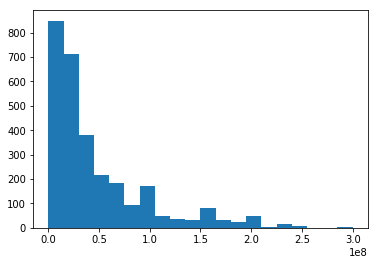

In [82]:
plt.hist(x=oscar_movies_only.budget, bins = 20)
#x axis is budget and y is frequency

In [86]:
#filter dataset for only winners
oscar_winners = oscar_movies_only[oscar_movies_only.winner_dummy == 1]


In [87]:
oscar_winners.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,budget,company,country,...,gross,rating,released,runtime,score,star,votes,writer,year,winner_dummy
0,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,22000000.0,Lakeshore Entertainment,USA,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1
5,1928,1929,2,WRITING,Hans Kraly,The Patriot,True,110000000.0,Columbia Pictures Corporation,USA,...,113330342.0,R,2000-06-28,165,7.2,Mel Gibson,221478,Robert Rodat,2000,1
11,1996,1997,69,MUSIC (Original Musical or Comedy Score),Rachel Portman,Emma,True,6000000.0,Miramax,UK,...,22201883.0,PG,1996-08-30,120,6.7,Gwyneth Paltrow,29972,Jane Austen,1996,1
12,1932,1933,6,ACTRESS,Katharine Hepburn,Morning Glory,True,0.0,Dove Audio,USA,...,21647.0,PG-13,1993-09-17,96,6.6,Christopher Reeve,315,Charles Jarrott,1993,1
13,1932,1933,6,ACTRESS,Katharine Hepburn,Morning Glory,True,40000000.0,Bad Robot,USA,...,31011732.0,PG-13,2010-11-10,100,6.5,Rachel McAdams,62536,Aline Brosh McKenna,2010,1


(array([151., 143.,  92.,  49.,  36.,  29.,  10.,  29.,  42.,   5.,   2.,
          2.,  22.,   6.,   9.,   3.,  24.,   0.,   1.,   4.]),
 array([0.0000e+00, 1.2250e+07, 2.4500e+07, 3.6750e+07, 4.9000e+07,
        6.1250e+07, 7.3500e+07, 8.5750e+07, 9.8000e+07, 1.1025e+08,
        1.2250e+08, 1.3475e+08, 1.4700e+08, 1.5925e+08, 1.7150e+08,
        1.8375e+08, 1.9600e+08, 2.0825e+08, 2.2050e+08, 2.3275e+08,
        2.4500e+08]),
 <a list of 20 Patch objects>)

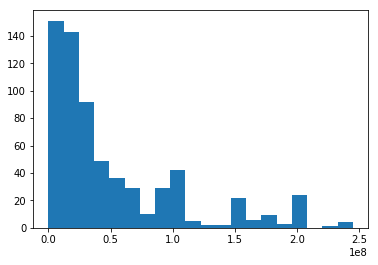

In [88]:
plt.hist(x=oscar_winners.budget, bins = 20)
#similar decay and clustered around low budget interestingly


(array([215.,  82.,  71.,  65.,  24.,  54.,  18.,  30.,  16.,  17.,  25.,
          8.,   0.,   2.,  19.,   7.,   0.,   4.,   0.,   2.]),
 array([3.1500000e+02, 9.2277800e+04, 1.8424060e+05, 2.7620340e+05,
        3.6816620e+05, 4.6012900e+05, 5.5209180e+05, 6.4405460e+05,
        7.3601740e+05, 8.2798020e+05, 9.1994300e+05, 1.0119058e+06,
        1.1038686e+06, 1.1958314e+06, 1.2877942e+06, 1.3797570e+06,
        1.4717198e+06, 1.5636826e+06, 1.6556454e+06, 1.7476082e+06,
        1.8395710e+06]),
 <a list of 20 Patch objects>)

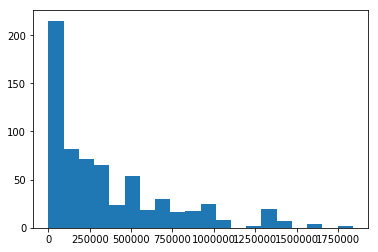

In [89]:
plt.hist(x=oscar_winners.votes, bins = 20)
#weird shape


(array([  7.,   0.,   0.,   2.,   4.,   2.,  22.,   8.,  17.,  27.,   9.,
         34.,  47.,  97.,  73., 143.,  59.,  50.,  23.,  35.]),
 array([4.1  , 4.345, 4.59 , 4.835, 5.08 , 5.325, 5.57 , 5.815, 6.06 ,
        6.305, 6.55 , 6.795, 7.04 , 7.285, 7.53 , 7.775, 8.02 , 8.265,
        8.51 , 8.755, 9.   ]),
 <a list of 20 Patch objects>)

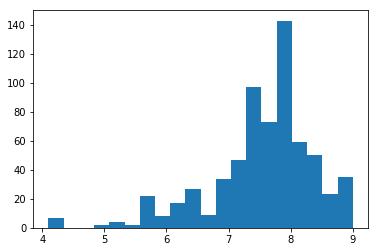

In [90]:
plt.hist(x=oscar_winners.score, bins = 20)
#somewhat normal distribution around 7.5 rating

<Figure size 7200x720 with 0 Axes>

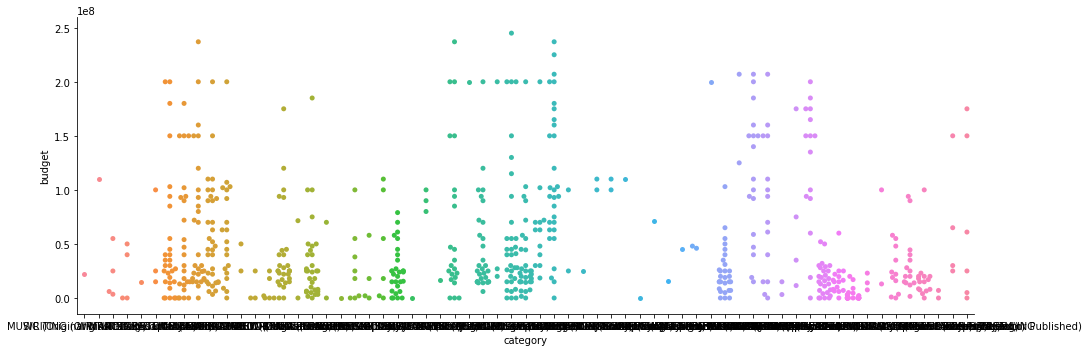

In [97]:
plt.figure(figsize=(100,10))
sns.catplot(x="category", y="budget", data=oscar_winners, kind='swarm', height=5, aspect=3) 
#plotting budget by category
#need to relabel category with number tag for readability

In [102]:
#unique_categories = oscar_winners['category'].unique()
#print(unique_categories)
#type(unique_categories)
oscar_winners.describe()

,year_film,year_ceremony,ceremony,budget,gross,runtime,score,votes,year,winner_dummy
count,659.000000,659.000000,659.000000,6.590000e+02,6.590000e+02,659.000000,659.000000,6.590000e+02,659.000000,659.0
mean,1995.432473,1996.432473,68.440061,5.004263e+07,1.170659e+08,128.629742,7.540668,3.550326e+05,2001.382398,1.0
std,18.384104,18.384104,18.357327,5.504440e+07,1.322289e+08,27.505889,0.854054,3.744011e+05,8.795346,0.0
min,1927.000000,1928.000000,1.000000,0.000000e+00,2.164700e+04,81.000000,4.100000,3.150000e+02,1986.000000,1.0
25%,1990.000000,1991.000000,63.000000,1.400000e+07,2.638468e+07,111.000000,7.200000,7.316100e+04,1994.000000,1.0
50%,1999.000000,2000.000000,72.000000,2.500000e+07,7.533160e+07,123.000000,7.700000,2.074470e+05,2001.000000,1.0
75%,2008.000000,2009.000000,81.000000,7.150000e+07,1.511018e+08,140.000000,8.100000,5.289100e+05,2009.000000,1.0
max,2019.000000,2020.000000,92.000000,2.450000e+08,7.605076e+08,242.000000,9.000000,1.839571e+06,2016.000000,1.0


In [114]:
arr = [0]*659
counter = 0
temp = 0
for i in arr:
    arr[counter] = temp
    counter += 1
    temp += 1
arr = np.array(arr)
#print(arr)

In [120]:
keys = oscar_winners['category'].astype(str).values.tolist()
#len(keys)
type(keys)

list

In [125]:
#dict(zip(keys, zip(*arr)))
cat_dict = dict(zip(keys, arr.T)) #create dictionary
print(cat_dict)

{'WRITING (Original Story)': 0, 'WRITING': 1, 'MUSIC (Original Musical or Comedy Score)': 317, 'ACTRESS': 67, 'WRITING (Adaptation)': 5, 'ART DIRECTION (Color)': 77, 'COSTUME DESIGN': 655, 'MAKEUP': 549, 'CINEMATOGRAPHY': 644, 'FILM EDITING': 634, 'SOUND': 391, 'SOUND RECORDING': 66, 'CINEMATOGRAPHY (Black-and-White)': 25, 'ART DIRECTION (Black-and-White)': 31, 'MUSIC (Original Score)': 646, 'MUSIC (Song)': 88, 'ACTOR IN A SUPPORTING ROLE': 650, 'WRITING (Motion Picture Story)': 73, 'WRITING (Screenplay)': 21, 'ACTOR': 94, 'COSTUME DESIGN (Black-and-White)': 61, 'BEST MOTION PICTURE': 83, 'ACTRESS IN A SUPPORTING ROLE': 649, 'SHORT SUBJECT (Two-reel)': 41, 'SPECIAL EFFECTS': 87, 'DOCUMENTARY (Feature)': 46, 'ART DIRECTION': 551, 'WRITING (Story and Screenplay)': 49, 'DIRECTING': 645, 'MUSIC (Original Dramatic Score)': 305, 'MUSIC (Original Song)': 647, 'BEST PICTURE': 651, 'SOUND EFFECTS EDITING': 337, 'VISUAL EFFECTS': 640, 'COSTUME DESIGN (Color)': 79, 'MUSIC (Scoring of a Musical Pi

In [129]:
#oscar_winners['category_index'] = oscar_winners['category'].map(cat_dict)
oscar_winners.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,budget,company,country,...,rating,released,runtime,score,star,votes,writer,year,winner_dummy,category_index
0,1927.0,1928.0,1.0,WRITING (Original Story),Ben Hecht,Underworld,1.0,22000000.0,Lakeshore Entertainment,USA,...,R,2003-09-19,121.0,7.0,Kate Beckinsale,225226.0,Kevin Grevioux,2003.0,1.0,0.0
5,1928.0,1929.0,2.0,WRITING,Hans Kraly,The Patriot,1.0,110000000.0,Columbia Pictures Corporation,USA,...,R,2000-06-28,165.0,7.2,Mel Gibson,221478.0,Robert Rodat,2000.0,1.0,1.0
11,1996.0,1997.0,69.0,MUSIC (Original Musical or Comedy Score),Rachel Portman,Emma,1.0,6000000.0,Miramax,UK,...,PG,1996-08-30,120.0,6.7,Gwyneth Paltrow,29972.0,Jane Austen,1996.0,1.0,317.0
12,1932.0,1933.0,6.0,ACTRESS,Katharine Hepburn,Morning Glory,1.0,0.0,Dove Audio,USA,...,PG-13,1993-09-17,96.0,6.6,Christopher Reeve,315.0,Charles Jarrott,1993.0,1.0,67.0
13,1932.0,1933.0,6.0,ACTRESS,Katharine Hepburn,Morning Glory,1.0,40000000.0,Bad Robot,USA,...,PG-13,2010-11-10,100.0,6.5,Rachel McAdams,62536.0,Aline Brosh McKenna,2010.0,1.0,67.0


<Figure size 7200x720 with 0 Axes>

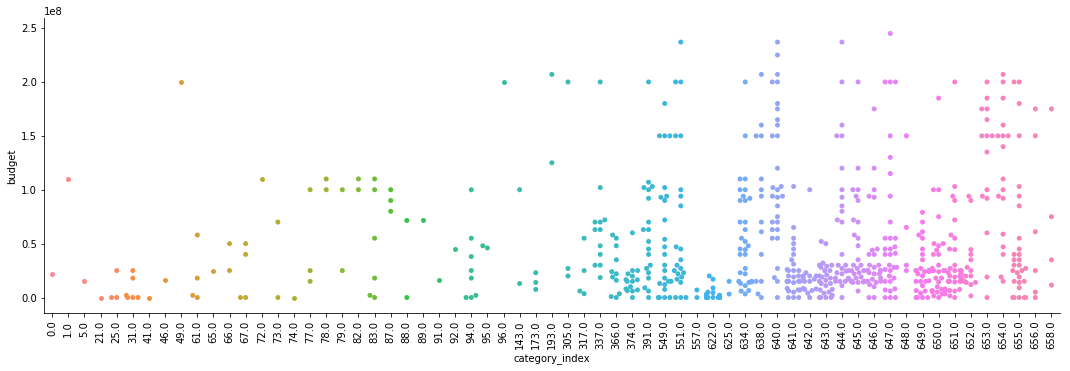

In [138]:
plt.figure(figsize=(100,10))
chart = sns.catplot(x="category_index", y="budget", data=oscar_winners, kind='swarm', height=5, aspect=3) 
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart_index = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in chart.axes.flat]

<Figure size 7200x720 with 0 Axes>

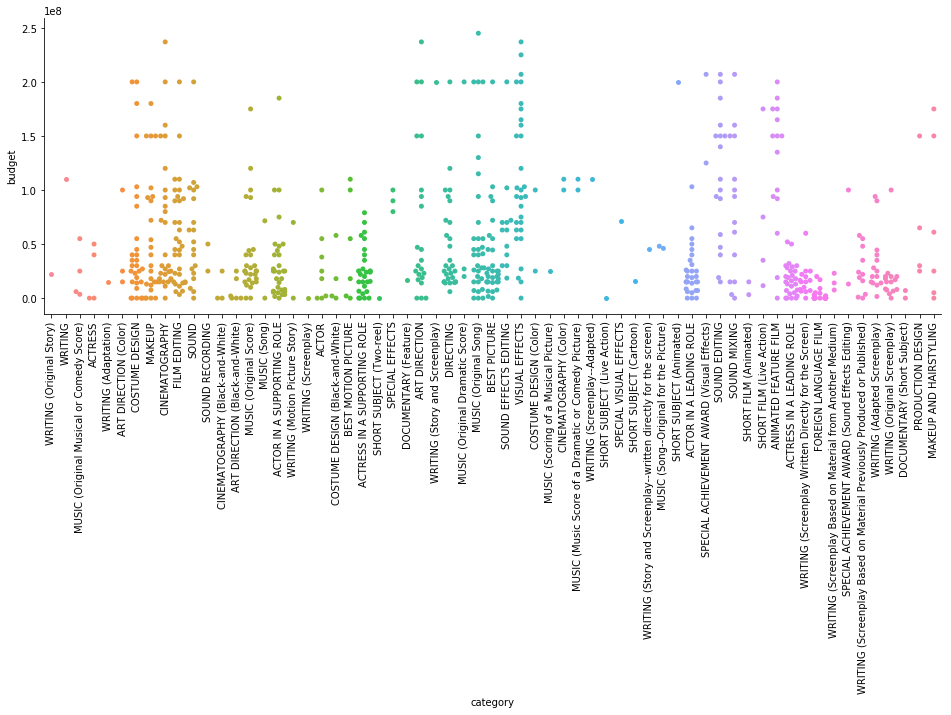

In [139]:
plt.figure(figsize=(100,10))
chart = sns.catplot(x="category", y="budget", data=oscar_winners, kind='swarm', height=5, aspect=3) 
budget_chart = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in chart.axes.flat]

<Figure size 7200x720 with 0 Axes>

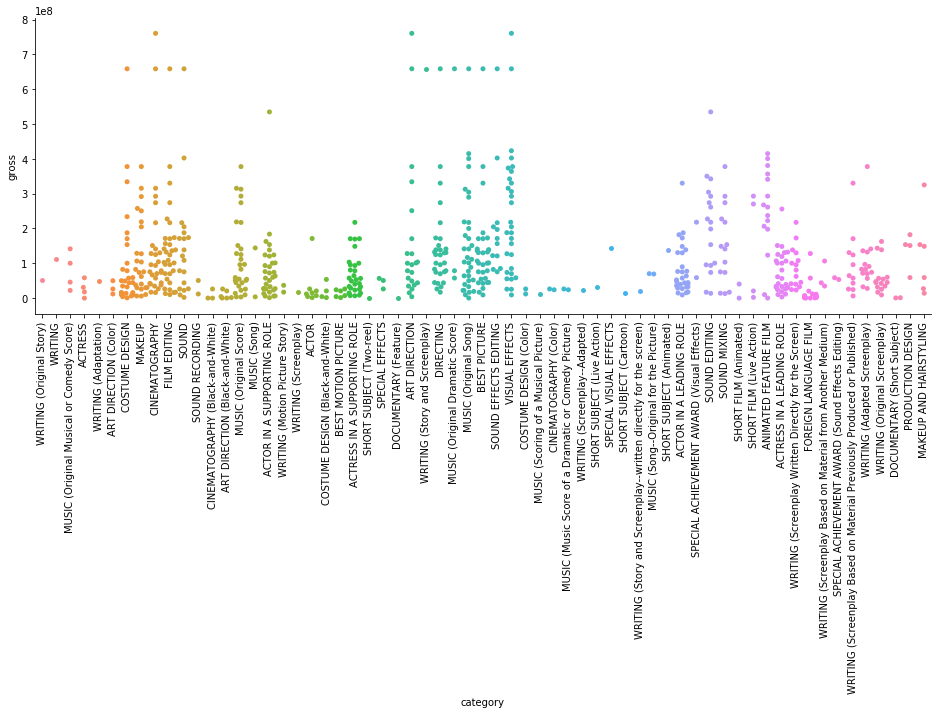

In [140]:
plt.figure(figsize=(100,10))
chart = sns.catplot(x="category", y="gross", data=oscar_winners, kind='swarm', height=5, aspect=3) 
gross_chart = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in chart.axes.flat]

<Figure size 7200x720 with 0 Axes>

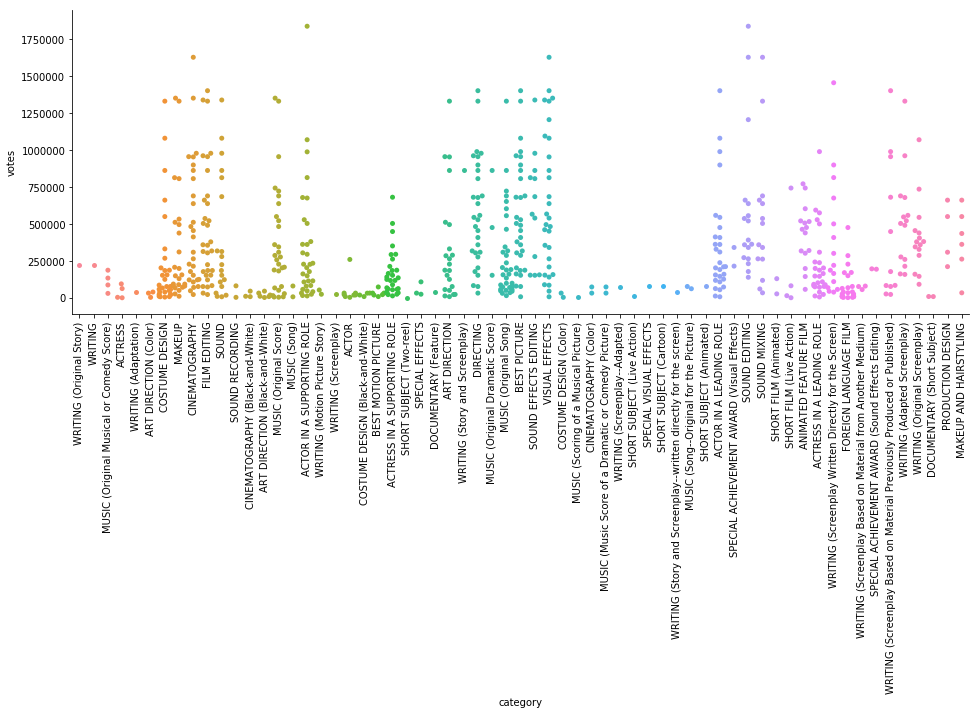

In [142]:
plt.figure(figsize=(100,10))
chart = sns.catplot(x="category", y="votes", data=oscar_winners, kind='swarm', height=5, aspect=3) 
votes_chart = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in chart.axes.flat]

<Figure size 7200x720 with 0 Axes>

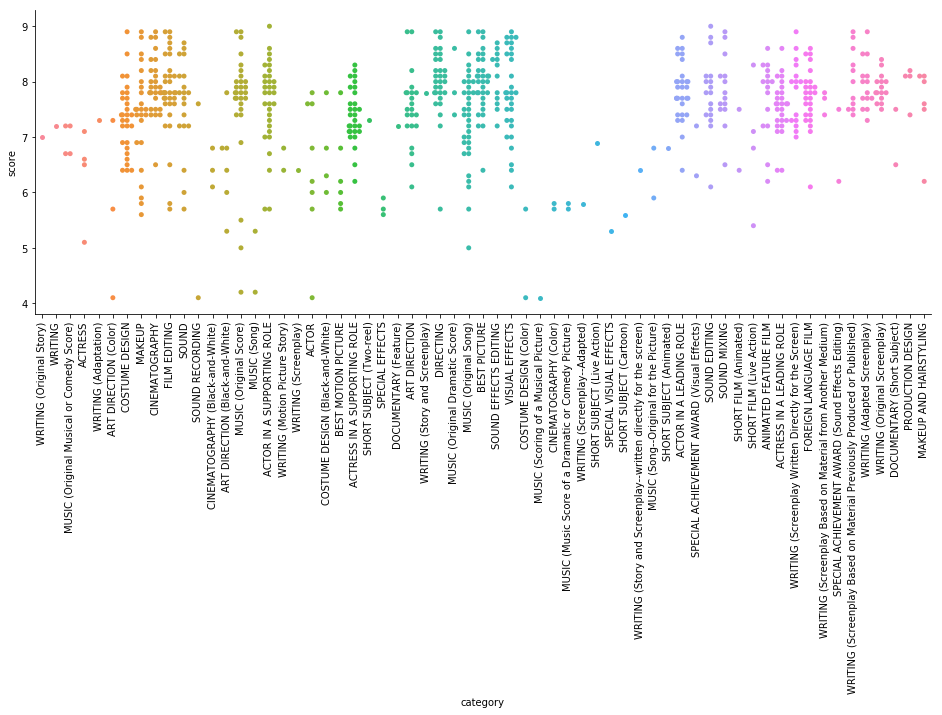

In [143]:
plt.figure(figsize=(100,10))
chart = sns.catplot(x="category", y="score", data=oscar_winners, kind='swarm', height=5, aspect=3) 
score_chart = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in chart.axes.flat]

<Figure size 7200x720 with 0 Axes>

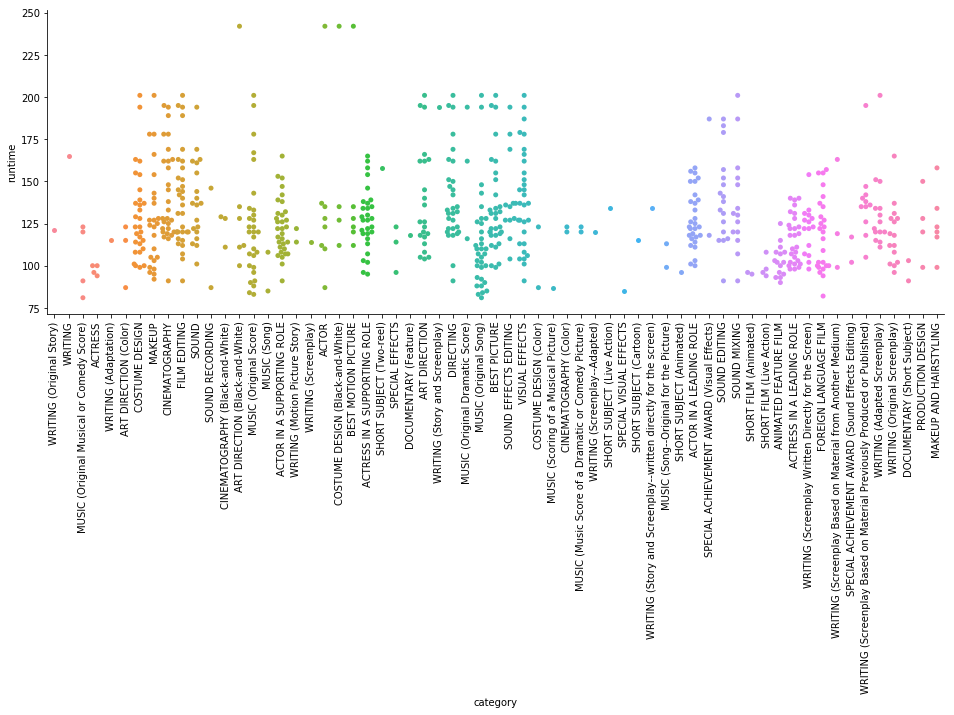

In [144]:
plt.figure(figsize=(100,10))
chart = sns.catplot(x="category", y="runtime", data=oscar_winners, kind='swarm', height=5, aspect=3) 
runtime_chart = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in chart.axes.flat]